<a href="https://colab.research.google.com/github/valeriocardoso/learning-area/blob/master/Statistics/Pingouin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin

     |████████████████████████████████| 225kB 2.8MB/s 
     |████████████████████████████████| 25.9MB 169kB/s 
  Created wheel for pingouin: filename=pingouin-0.3.7-cp36-none-any.whl size=217260 sha256=57aa55cdf0e8651308fe50f18cf82d50a4024b9f2c02ce8fcc56ecb702123146
  Stored in directory: /root/.cache/pip/wheels/02/92/32/0ed9ac4a9407227f3f070170a26d05f07d6f2a8a68989a8ac3
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=e4ead92a625244173d1b9be43e3bbb676c7a60af8efff338d6ac431aef4c40c4
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7049 sha256=a50d08437da9a3299221f87ee20573ca8f0e38fbf841a508d66aee474cf575ce
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils
ERROR: tensorflow 2.3.0 has requirement scipy==1.

In [3]:
import numpy as np
import pingouin as pg

In [5]:
np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


In [6]:
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.353769,0.3059,0.000527,69.723,0.950373


In [7]:
# Introduce an outlier
x[5] = 18
# Use the robust Shepherd's pi correlation
pg.corr(x, y, method="shepherd")

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,30,1,0.561084,"[0.25, 0.77]",0.314815,0.264061,0.001543,0.916576


In [8]:
print(pg.normality(x))                                    # Univariate normality
print(pg.multivariate_normality(np.column_stack((x, y)))) # Multivariate normality

          W          pval  normal
0  0.615321  1.128503e-07   False
(False, 0.00018201726664169923)


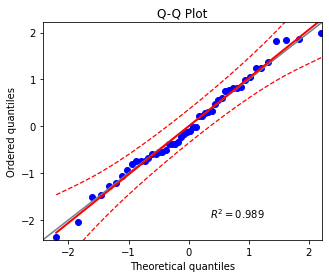

In [9]:
import numpy as np
import pingouin as pg
np.random.seed(123)
x = np.random.normal(size=50)
ax = pg.qqplot(x, dist='norm')

In [11]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.459963,1,5.459963,5.243656,0.0232,0.028616
1,Within,185.342729,178,1.041251,NaN,NaN,NaN


In [12]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.062194,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


In [13]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A        B        Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust      BF10    hedges
----------  -------  -------  --------  ------------  ------  ------  ---------  -------  --------  ----------  ------  --------
Time        August   January  True      True          -1.740  59.000  two-sided    0.087     0.131  fdr_bh       0.582    -0.328
Time        August   June     True      True          -2.743  59.000  two-sided    0.008     0.024  fdr_bh       4.232    -0.483
Time        January  June     True      True          -1.024  59.000  two-sided    0.310     0.310  fdr_bh       0.232    -0.170



In [14]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        5.460      1     58  5.460  5.052    0.028  0.080  nan
Time         7.628      2    116  3.814  4.027    0.020  0.065    0.999
Interaction  5.167      2    116  2.584  2.728    0.070  0.045  nan

